In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('results.csv')

In [4]:
data

,n,max_load,empty
0,100,40,5
1,100,37,4
2,100,38,5
3,100,40,4
4,100,36,4
...,...,...,...
99995,10000,3737,7
99996,10000,3692,6
99997,10000,3659,6
99998,10000,3707,7


In [5]:
summary = data.groupby('n').agg([np.min, np.max, np.mean, np.var, np.std])

In [6]:
summary

max_load                                        empty              \
          amin  amax      mean         var        std  amin amax   mean   
n                                                                         
100         26    46    36.735    9.514289   3.084524     3    8  4.236   
200         57    88    73.235   21.082858   4.591607     3    8  4.615   
300         92   130   110.160   28.156557   5.306275     3    8  4.842   
400        130   166   147.128   37.427043   6.117765     3    9  5.008   
500        160   202   184.084   47.980925   6.926826     4    8  5.168   
...        ...   ...       ...         ...        ...   ...  ...    ...   
9600      3420  3626  3532.045  908.345320  30.138768     5   10  6.648   
9700      3470  3660  3569.493  961.061012  31.000984     5   10  6.654   
9800      3507  3705  3603.872  981.785401  31.333455     5   10  6.672   
9900      3555  3755  3642.438  852.186342  29.192231     5   10  6.679   
10000     3583  3767  3678.168  948.332108  30.795001     5   10  6.668   

                           
            var       std  
n                          
100    0.594899  0.771297  
200    0.543318  0.737101  
300    0.553590  0.744036  
400    0.552488  0.743296  
500    0.556332  0.745877  
...         ...       ...  
9600   0.484581  0.696118  
9700   0.510795  0.714699  
9800   0.504921  0.710578  
9900   0.460419  0.678542  
10000  0.476252  0.690110  

[100 rows x 10 columns]

# Max load

Do analizy użyjemy nierówności Czebyszewa $P(|X - E(X)| \geq t) \leq \frac{\mathrm{Var}(X)}{t^2}$

Przyjmijmy $\frac{\mathrm{Var}(X)}{t^2} = 0.05$

Z tego otrzymujemy $t = \sqrt{\frac{\mathrm{Var}(X)}{0.05}}$

In [20]:
def compute_t(data):
    return np.sqrt(data['var'] / 0.02)

In [21]:
max_load = summary['max_load']
empty = summary['empty']

In [22]:
t_ml = compute_t(max_load)

Następnie możemy wyliczyć ograniczenia, góre oraz dolne, wynikające z nierówności Czebyszewa

$X_u = E(X) + t$

$X_l = E(X) - t$

In [23]:
def compute_chebyschev_bounds(data, t):
    return data['mean'] + t, data['mean'] -t

In [24]:
x_u_ml, x_l_ml = compute_chebyschev_bounds(max_load, t_ml)

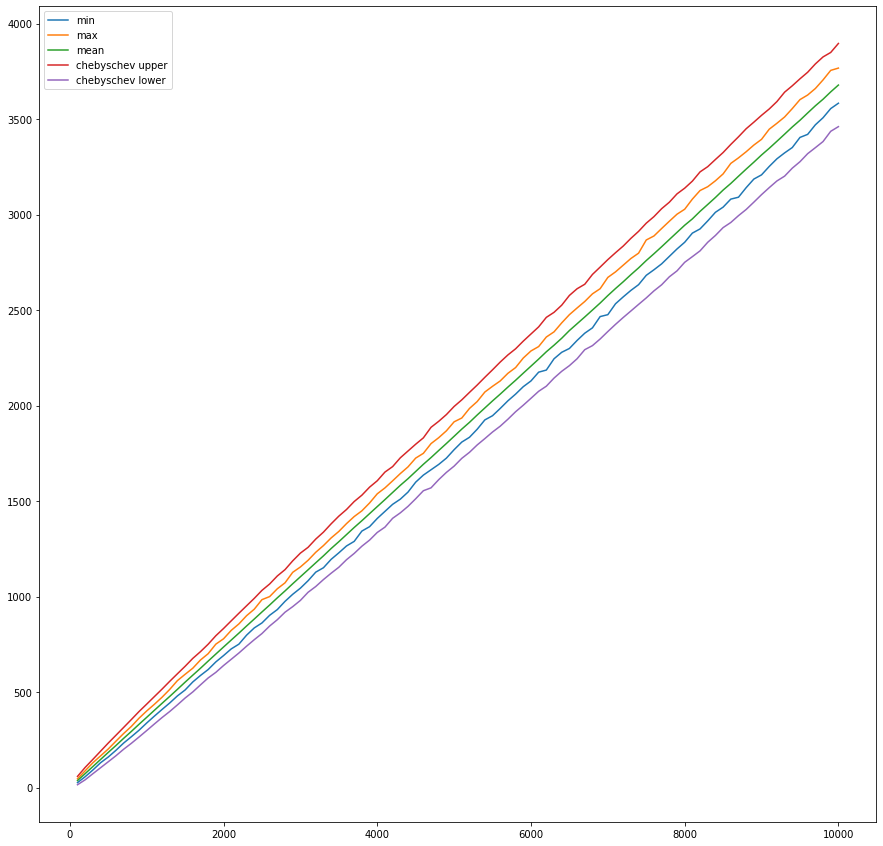

In [25]:
x = np.linspace(100, 10000, 100)
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(x, max_load['amin'], label='min')
ax.plot(x, max_load['amax'], label='max')
ax.plot(x, max_load['mean'], label='mean')
ax.plot(x, x_u_ml, label='chebyschev upper')
ax.plot(x, x_l_ml, label='chebyschev lower')
ax.legend()